In [28]:
import matplotlib.pyplot as plt
from pykat import finesse                 
from pykat.commands import * 

%matplotlib inline
pykat.init_pykat_plotting(dpi=90)

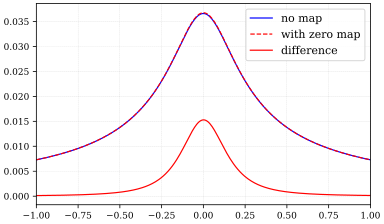

In [29]:
#input HG00
kat00 = pykat.finesse.kat()
kat00.verbose=False
kat00.parse("""
l laser 1 0 0 n0
s s0 1 n0 nmod1

mod eom 60M 0.3 1 pm nmod1 nmod2
s s1 0 nmod2 n1

m1 ITM 0.014 3.75e-05 0 n1 n2
s sCav 3994.4692 n2 n3
m1 ETM 5e-06 3.75e-05 0 n3 n4

#higher order mode TEM33
#tem laser 0 0 0.0 0.0
#tem laser 3 3 1.0 0.0

#Gaussian model
cav cavity ITM n2 ETM n3
attr ITM Rc -1934.0
attr ETM Rc 2245.0

xaxis ETM phi lin -1 1 300
maxtem 8

""")


kat1 = kat00.deepcopy()
kat1.parse("""
        ad AD00 0 0 0 n4
        """)

out1=kat1.run()

kat2 = kat00.deepcopy()
kat2.parse("""
        map ETM Z22order0phasemap_finesse.txt
        ad AD00 0 0 0 n4
        """)
out2=kat2.run()
plt.figure()
plt.plot(out1.x,out1['AD00'],label='no map')
plt.plot(out2.x,out2['AD00'],'r--',label='with zero map')
plt.plot(out2.x,(out2['AD00']-out1['AD00'])*100,label='difference')
plt.legend()
plt.show()

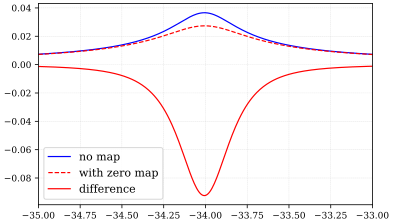

In [30]:
#input HG33
kat33 = pykat.finesse.kat()
kat33.verbose=False
kat33.parse("""
l laser 1 0 0 n0
s s0 1 n0 nmod1

mod eom 60M 0.3 1 pm nmod1 nmod2
s s1 0 nmod2 n1

m1 ITM 0.014 3.75e-05 0 n1 n2
s sCav 3994.4692 n2 n3
m1 ETM 5e-06 3.75e-05 0 n3 n4

#higher order mode TEM33
tem laser 0 0 0.0 0.0
tem laser 3 3 1.0 0.0

#Gaussian model
cav cavity ITM n2 ETM n3
attr ITM Rc -1934.0
attr ETM Rc 2245.0


xaxis ETM phi lin -35 -33 300
maxtem 8

""")


kat1 = kat33.deepcopy()
kat1.parse("""
        ad AD33 3 3 0 n4
        """)

out1=kat1.run()

kat2 = kat33.deepcopy()
kat2.parse("""
        map ETM Z22order0phasemap_finesse.txt
        ad AD33 3 3 0 n4
        """)
out2=kat2.run()
plt.figure()
plt.plot(out1.x,out1['AD33'],label='no map')
plt.plot(out2.x,out2['AD33'],'r--',label='with zero map')
plt.plot(out2.x,(out2['AD33']-out1['AD33'])*10,label='difference')
plt.legend()
plt.show()